In [2]:
import xarray as xr
import datetime
import pymannkendall as mk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import theilslopes
from dask.diagnostics import ProgressBar
import pymannkendall as mk

import pandas as pd
import datetime

In [3]:
# load landcover and anette's landcover! (first normal landcover)
land_cover = xr.open_dataset('/mnt/data7/nfs4/avh_ndvi/sdupuis/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc', engine='netcdf4')

In [4]:
land_cover

<xarray.Dataset>
Dimensions:              (lat: 64800, lon: 129600)
Coordinates:
  * lat                  (lat) float32 90.0 90.0 89.99 ... -89.99 -90.0 -90.0
  * lon                  (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    lccs_class           (lat, lon) float32 ...
    processed_flag       (lat, lon) float32 ...
    current_pixel_state  (lat, lon) float32 ...
    observation_count    (lat, lon) float32 ...
    change_count         (lat, lon) float32 ...
    crs                  int32 ...
Attributes: (12/38)
    title:                      ESA CCI Land Cover Map
    summary:                    This dataset contains the global ESA CCI land...
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y
    id:                         ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-landcover-cci.org/
    ...                         ...
    geospatial_lon_max:         180.0
    spatial_resolution:         300m
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.002778
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.002778

In [5]:
lc = land_cover.sel(lat=slice(72,55), lon=slice(-168,-150))

In [6]:
lst_2001 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2001/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [7]:
lst_2002 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2002/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [8]:
lst_2003 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2003/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [9]:
lst_2004 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2004/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [10]:
lst_2005 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2005/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [11]:
lst_2006 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2006/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [12]:
lst_2007 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2007/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2008 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2008/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2009 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2009/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2010 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2010/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2011 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2011/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2012 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2012/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2013 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2013/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2014 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2014/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2015 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2015/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2016 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2016/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2017 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2017/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2018 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2018/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lc_interp = lc.interp(lat=lst_2018.coords['lat'], lon=lst_2018.coords['lon'], method='nearest')

In [ ]:
results = {}

for year in range(2001, 2019):

    ds = globals()[f"lst_{year}"]   # load lst_1981, lst_1982, ...

    # 2. Fixed 10-day bins anchored at Jan 1 every year
    
    ds = ds.where(lc_interp['lccs_class'] != 210)
    print(ds)
    clean_LST = ds['LST'].where(ds['LST'] != 110, np.nan)
    max_mon = (
        clean_LST
        .resample(
            time='1MS'
        )
        .max()
    )

    # Ensure bins exist even with no data
    # Xarray automatically creates them and fills with NaN

    results[year] = max_mon


<xarray.DataArray 'day' (time: 364)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1, 

/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

<xarray.DataArray 'day' (time: 365)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1, 

/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

<xarray.DataArray 'day' (time: 365)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1, 

/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

<xarray.DataArray 'day' (time: 365)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1, 

/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

<xarray.DataArray 'day' (time: 365)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1, 

/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

<xarray.DataArray 'day' (time: 365)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1, 

/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

<xarray.DataArray 'day' (time: 365)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1, 

/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

<xarray.DataArray 'day' (time: 365)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1, 

/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

<xarray.DataArray 'day' (time: 365)>
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1,  1, 

/tmp/ipykernel_18317/899657111.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(


In [ ]:
combined = xr.concat([results[y] for y in range(2001, 2019)], dim="time")


In [ ]:
import pandas as pd

new_time = combined.time.to_index() + pd.DateOffset(months=1)

combined = combined.assign_coords(time=new_time)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
jf_max = (
    combined
    .where(combined.time.dt.month.isin([1, 2]), drop=True)
    .groupby("time.year")
    .max("time")
)
ja_max = (
    combined
    .where(combined.time.dt.month.isin([7, 8]), drop=True)
    .groupby("time.year")
    .max("time")
)
clim_jf = jf_max.mean("year")
anom_jf = jf_max - clim_jf
clim_ja = ja_max.mean("year")
anom_ja = ja_max - clim_ja

anoms = anom_ja.sel(lat=slice(55,72), lon=slice(-168,-150))
anoms = anoms.chunk(dict(year=-1))   # <<< REQUIRED

In [ ]:
def theil_sen_1d(y, x):
    # remove NaNs
    mask = np.isfinite(y) & np.isfinite(x)
    
    # not enough data points → return NaN
    if mask.sum() < 5:
        return np.nan
    
    slope, intercept, lower, upper = theilslopes(y[mask], x[mask])
    return slope

In [ ]:
slope_ja = xr.apply_ufunc(
    theil_sen_1d,
    anoms,
    anoms.year.values,
    input_core_dims=[["year"], ["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

trend_per_decade_ja = slope_ja * 1

In [ ]:
with ProgressBar():
    res_ja = trend_per_decade_ja.compute()

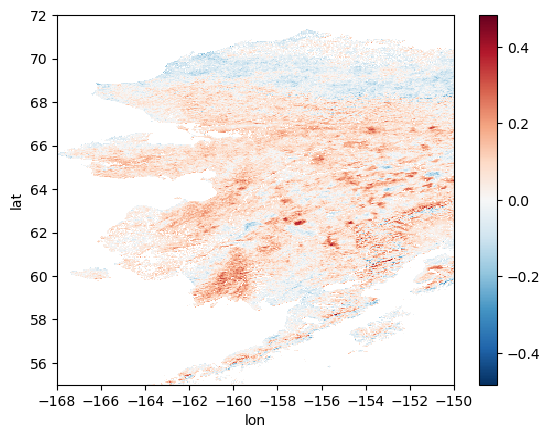

In [ ]:
res_ja.plot();
# seems too much!
# comiso and hall same magnitude for Alaska

In [ ]:
import pymannkendall as mk

def mk_pvalue(y):
    y = y[np.isfinite(y)]
    if y.size < 5:
        return np.nan
    return mk.original_test(y).p

In [ ]:
# spacing of the 10D max bins ? space it like 3 per month ? -> use monthly max ? maybe use bi-monthly
# robustness of trends ? -> maybe 5 points! 
# validtidy of mean for the climatology ? clear-sky biais trend there ?
# clear sky bias ? -> compute number of valid points !
# annual max temp ? - satellites are drifting? -> verify time series, compare with modis! what are the overpass times ? afternoon sats are the warm temperatures !
# compare to MODIS data ? -> maybe few points ?
# mask out with significance ?
# compare with CARRA 

In [ ]:
mk_p_ja = xr.apply_ufunc(
    mk_pvalue,
    anoms,
    input_core_dims=[["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

In [ ]:
with ProgressBar():
    p_val_ja = mk_p_ja.compute()

[########################################] | 100% Completed | 32m 52s


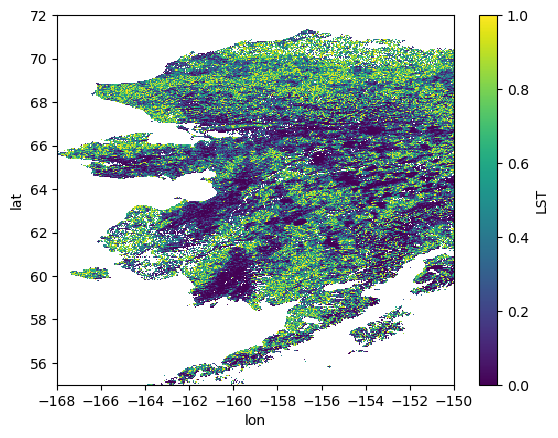

In [ ]:
p_val_ja.plot();

In [ ]:
significant_trend_ja = res_ja.where(p_val_ja < 0.1)

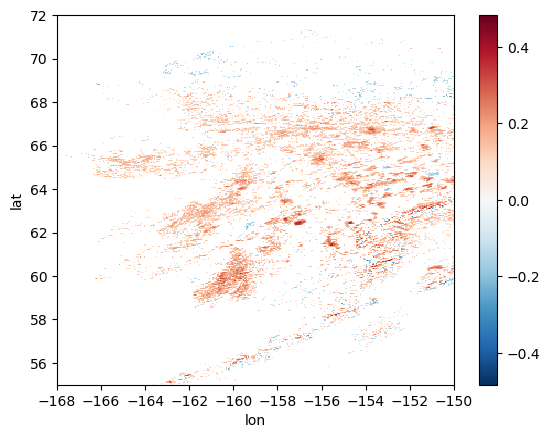

In [ ]:
significant_trend_ja.plot();

In [ ]:
# verify those trends with CARRA ? or era5 land ? -> keeping only clear sky days! -> Apply the GAC cloud mask ! rather era5 land, because i already have the data

In [ ]:
significant_trend_ja.to_netcdf('significant_trends_noaa_2001_2018_ja.nc')

NameError: name 'significant_trend' is not defined

In [ ]:
## Winter
anoms_jf = anom_jf.sel(lat=slice(55,72), lon=slice(-168,-150))
anoms_jf = anoms_jf.chunk(dict(year=-1))   # <<< REQUIRED

In [ ]:
slope_jf = xr.apply_ufunc(
    theil_sen_1d,
    anoms_jf,
    anoms_jf.year.values,
    input_core_dims=[["year"], ["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

trend_per_decade_jf = slope_jf * 1

In [ ]:
with ProgressBar():
    res_jf = trend_per_decade_jf.compute()

In [ ]:
res_jf.plot();

In [ ]:
mk_p_jf = xr.apply_ufunc(
    mk_pvalue,
    anoms_jf,
    input_core_dims=[["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

In [ ]:
with ProgressBar():
    p_val_jf = mk_p_jf.compute()

In [ ]:
significant_trend_jf = res_jf.where(p_val_jf < 0.1)

In [ ]:
significant_trend_jf.plot();